<a href="https://colab.research.google.com/github/SebastianBelmonte01/AndroidApp_Puzzle/blob/main/BelmonteSebastian_Desafio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colorectal histology dataset with LeNet 5

# Preview: Neural Network examples with `tf.keras`

- `tf.keras` Software (http://keras.io/);

- Visual example of LeNet-5 (http://yann.lecun.com/exdb/lenet/) using MNIST digits dataset;

- Examples with common neural network topologies (https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/).

## Colorectal histology

Methods to diagnose colorectal using histology images (<https://zenodo.org/record/53169#.XGZemKwzbmG>, <https://www.tensorflow.org/datasets/catalog/colorectal_histology>)

In this case, the purpose is to classify the type of histology in a given image in the following categories:

- 0: TUMOR
- 1: STROMA
- 2: COMPLEX
- 3: LYMPHO
- 4: DEBRIS
- 5: MUCOSA
- 6: ADIPOSE
- 7: EMPTY

## Local instalation (option 1)

Install the following Python packages to run this notebook

`pip install pip -U`

`pip install tensorflow jupyter`

## Google Colab (option 2)

[Google Colab](https://colab.research.google.com/) is a research project created to help disseminate machine learning education and research. It's a `Jupyter notebook` environment that requires no setup to use and runs entirely in the cloud.

Colaboratory notebooks are stored in [Google Drive](https://drive.google.com) and can be shared just as you would with Google Docs or Sheets. Colaboratory is free to use.

For more information, see our [FAQ](https://research.google.com/colaboratory/faq.html).

### How install extra packages
Google Colab installs a series of basic packages if we need any additional package just install it.

In [ ]:
#!pip install scikit-learn -U

#Strtifiedkfold 

## Import packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

from sklearn.model_selection import StratifiedKFold

## Define global constants

Lets start with a few epochs to test learning network parameters

In [ ]:
batch_size = 32 #tamaño del conjunto cada cuantos se deben mirar para despues actualizar los pesos
nb_classes = 2  #or 8
epochs = 25

# Scaling input image to theses dimensions
img_rows, img_cols = 32, 32

## Load image database

In [ ]:
def format_example(image):
    image = tf.cast(image, tf.float32)
    # Normalize the pixel values
    image = image / 255.0
    # Resize the image
    image = tf.image.resize(image, (img_rows, img_cols))
    return image


def load_data(name="colorectal_histology"):
  train_ds = tfds.load(name, split=tfds.Split.TRAIN, batch_size=-1)
  train_ds['image'] = tf.map_fn(format_example, train_ds['image'], dtype=tf.float32)
  numpy_ds = tfds.as_numpy(train_ds)
  X, y = numpy_ds['image'], numpy_ds['label']

  return np.array(X), np.array(y)

## Plot images

In [ ]:
def plot_symbols(X,y,n=15):
    index = np.random.randint(len(y), size=n)
    plt.figure(figsize=(25, 2))
    for i in np.arange(n):
        ax = plt.subplot(1,n,i+1)
        plt.imshow(X[index[i],:,:,:])
        plt.gray()
        ax.set_title(f'{y[index[i]]}-{index[i]}')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

## Build LeNet5 structure

<center><img src="https://www.dlsi.ua.es/~juanra/UA/curso_verano_DL/images/LeNet5.jpg"></center>

In [ ]:
#
# Build an ANN structure - LeNet5
#

def cnn_model():
    #
    # Neural Network Structure
    #
    
    model = Sequential()
    
    model.add(layers.Conv2D(6, (5, 5)))
    #model.add(layers.Activation("relu"))
    model.add(layers.Activation("sigmoid"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Conv2D(16, (5, 5)))
    #model.add(layers.Activation("relu"))
    model.add(layers.Activation("sigmoid"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        
    model.add(layers.Flatten())
    
    model.add(layers.Dense(120))
    #model.add(layers.Activation("relu"))
    model.add(layers.Activation("sigmoid"))

    model.add(layers.Dense(84))
    #model.add(layers.Activation("relu"))
    model.add(layers.Activation("sigmoid"))
    
    model.add(layers.Dense(nb_classes))
    #Tiene que ser la ultima porque es la que potencia la salida
    model.add(layers.Activation('softmax'))

    return model

## **Models Implemented by Sebastian Belmonte**

---
For image classification we are going to usea a convolutional neural network where it has convolutions (hidden layers, filters, etc), pooling where it reduces data in small segments.

In [ ]:
def cnn_model_2d():
  model = tf.keras.models.Sequential([
      
      #first layer
      #32 different Filters, 
      tf.keras.layers.Conv2D(
          32, (5, 5), activation ="relu", input_shape=(32, 32, 3)
      ),

      #You see 2x2 images and extract the max value
      tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

      tf.keras.layers.Flatten(), 

      #Addind hidden layers
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dropout(0.5),

      #Adding an output for all 8 cancer types
      #Softmax probability distribution
      #Output Layer
      tf.keras.layers.Dense(2, activation="softmax")

  ])
  return model

## Start to run the program

### Load data

In [ ]:
##################################################################################
# Main program

X, y = load_data()

print(X.shape, 'train samples')
print(img_rows,'x', img_cols, 'image size')
print(epochs,'epochs')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/5000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/colorectal_histology/2.0.0.incomplete43OPVV/colorectal_histology-train.tfrecor…

Dataset colorectal_histology downloaded and prepared to ~/tensorflow_datasets/colorectal_histology/2.0.0. Subsequent calls will reuse this data.
(5000, 32, 32, 3) train samples
32 x 32 image size
25 epochs


Only for binary classification. All number of classes greater than 0 will be set to 1.

In [ ]:
if nb_classes==2: #Quiere decir si hay dos clases
  y[y>0] = 1 #Los que son otra cosa se les asigna el valor de uno

### Let to see examples of the dataset

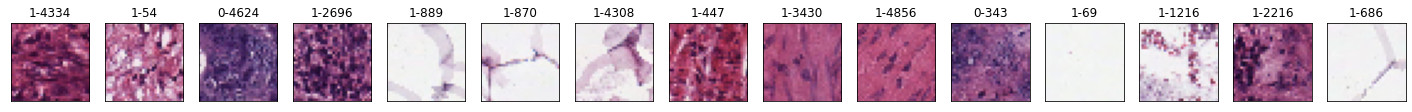

In [ ]:
plot_symbols(X, y, 15)

## Number of examples per class

In [ ]:
pd.DataFrame({'ncount':pd.Series(y).value_counts(), '% ncount':pd.Series(y).value_counts(normalize=True)*100})

,ncount,% ncount
1,4375,87.5
0,625,12.5


## Split examples in training/test sets

This section is introductory to serve as a simple example. To test the model created in different situations, a 10 cross validation (10-CV) strategy should be used. 

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#print(f'X_train {X_train.shape} X_test {X_test.shape}')
#print(f'y_train {y_train.shape} y_test {y_test.shape}')

skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
skf.get_n_splits(X, y)
print(skf)

for train_index, test_index in skf.split(X, y):
  #print("Train: ", train_index, " Test: ", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]



print(f'X_train {X_train.shape} X_test {X_test.shape}')
print(f'y_train {y_train.shape} y_test {y_test.shape}')

StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
X_train (4500, 32, 32, 3) X_test (500, 32, 32, 3)
y_train (4500,) y_test (500,)


### Model and optimizers

Test [optimizer](https://keras.io/optimizers/) parameter with `sgd`, `adadelta` or `adam` values in order to check the final precision achieved.

## **Class Model Compilation**



In [ ]:
#model = cnn_model()
model = cnn_model_2d()

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam', 
    metrics=['accuracy']
)

#early_stopping = EarlyStopping(monitor='val_loss', patience=10)
#model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=2, callbacks=[early_stopping])
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=2 )
print(model.summary())

Epoch 1/25
127/127 - 1s - loss: 0.3031 - accuracy: 0.8768 - val_loss: 0.3032 - val_accuracy: 0.8533 - 932ms/epoch - 7ms/step
Epoch 2/25
127/127 - 0s - loss: 0.2610 - accuracy: 0.8859 - val_loss: 0.2809 - val_accuracy: 0.8422 - 429ms/epoch - 3ms/step
Epoch 3/25
127/127 - 0s - loss: 0.2179 - accuracy: 0.9030 - val_loss: 0.2860 - val_accuracy: 0.8600 - 399ms/epoch - 3ms/step
Epoch 4/25
127/127 - 0s - loss: 0.2052 - accuracy: 0.9089 - val_loss: 0.2022 - val_accuracy: 0.9178 - 408ms/epoch - 3ms/step
Epoch 5/25
127/127 - 0s - loss: 0.1770 - accuracy: 0.9274 - val_loss: 0.1777 - val_accuracy: 0.9378 - 432ms/epoch - 3ms/step
Epoch 6/25
127/127 - 0s - loss: 0.1544 - accuracy: 0.9353 - val_loss: 0.1538 - val_accuracy: 0.9422 - 402ms/epoch - 3ms/step
Epoch 7/25
127/127 - 0s - loss: 0.1431 - accuracy: 0.9440 - val_loss: 0.1704 - val_accuracy: 0.9200 - 408ms/epoch - 3ms/step
Epoch 8/25
127/127 - 0s - loss: 0.1313 - accuracy: 0.9506 - val_loss: 0.2079 - val_accuracy: 0.9022 - 435ms/epoch - 3ms/step


## **First Model Compilation**




In [ ]:
'''
model = cnn_model_2d

model.compile(
    loss='categorical_crossentropy', #Changed Parameter
    optimizer='adam', 
    metrics=['accuracy']
)

#early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=2) #, callbacks=[early_stopping])

print(model.summary())
'''
#Se pensó en utiizar una perdida de 'crossentropy sin embargo, usamos la que ya se tenia ya que selecciona solamente a uno en cabio crossentropy da toda una 
# gama de todas las posibles respuestas que puedan ser


#FUNCION DE ACTIVACION
# La función de activación utilizadas actualmente son las funciones de activación no lineares ya que ofrecen conexiones multiples 
# Softmax
# Relu
# Tangente Hiperbolica
# Softmax

#https://medium.com/@snaily16/what-why-and-which-activation-functions-b2bf748c0441

In [ ]:
loss, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print(f'loss: {loss:.2f} acc: {acc:.2f}')

16/16 [==============================] - 0s 3ms/step - loss: 0.2172 - accuracy: 0.9400
loss: 0.22 acc: 0.94


In [ ]:
# Output prediction for the first five X_test images
model.predict(X_test[:5], batch_size=batch_size)

1/1 [==============================] - 0s 57ms/step


array([[9.6781650e-06, 9.9999034e-01],
       [5.7223893e-08, 1.0000000e+00],
       [9.5460296e-01, 4.5396987e-02],
       [1.0519991e-06, 9.9999893e-01],
       [2.8403438e-06, 9.9999714e-01]], dtype=float32)

## Prediction

### Testing AUC result for two and multiple classes

In [ ]:
y_scores = model.predict(X_test) # Confidence prediction per class y_pred = y_scores.argmax(axis=1) # Select classes with most confidence prediction

if nb_classes == 2: print(f'AUC {metrics.roc_auc_score(y_test, np.round(y_scores[:,1],2)):.4f} ') 
else: print(f'AUC {metrics.roc_auc_score(y_test, y_scores, multi_class = "ovr"):.4f} ')

16/16 [==============================] - 0s 2ms/step
AUC 0.9516 


## More metrics about results

We can find more information about `precision`, `recall` and `f1` metrics in <https://en.wikipedia.org/wiki/Precision_and_recall>.

In [ ]:
y_pred = y_scores.argmax(axis=1)
print('Predictions', pd.Series(y_pred).value_counts(),'\n')

print('Confusion matrix')
print(metrics.confusion_matrix(y_test,y_pred),'\n')

target_names = ['TUMOR', 'HEALTHY'] if nb_classes ==  2 else ['TUMOR','STROMA','COMPLEX','LYMPHO','DEBRIS','MUCOSA','ADIPOSE','EMPTY']

print(metrics.classification_report(y_test, y_pred, target_names=target_names))

Predictions 1    416
0     84
dtype: int64 

Confusion matrix
[[ 53  10]
 [ 31 406]] 

              precision    recall  f1-score   support

       TUMOR       0.63      0.84      0.72        63
     HEALTHY       0.98      0.93      0.95       437

    accuracy                           0.92       500
   macro avg       0.80      0.89      0.84       500
weighted avg       0.93      0.92      0.92       500

